<a href="https://colab.research.google.com/github/NataliaOlarte/Ciencia_de_datos/blob/main/Ciencias_de_datos_17_03_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ESTIMACIÓN DE LA VARIABILIDAD
\
## 1. Varianza
Suma de los cuadrados de las desviaciones de la media al cuadrado dividido por n-1, donde **n** es el número de valores de datos
## 2. Desviación Estándar
(Rango de variabilidad) Raíz cuadrada de la varianza
## 3. Desviación Media absoluta
Media de valores absolutos de las desviaciones de la media
## 4. Desviación absoluta de la mediana
Mediana de los valores absolutos de las desviaciones de la mediana.
## 5. Rango
Diferencia entre el valos máximimo y mínimo de un conjunto de datos
## 6. Estadística ordinal
Métricas basadas en los valores de datos ordenados de mayor a menor.
## 7. Percentil
Valor tal q P por ciento de los valores toma este valor o un valor inferior y para (100-P) el porcentaje toma este valor superior
## 8. Rango intercuartil
Diferencia entre el percentil 75 y el percentil 25


In [2]:
#Cargar datos desde google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install statsmodels
!pip install wquantiles

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels import robust
import wquantiles

In [5]:
data=pd.read_csv('/content/drive/MyDrive/Ciencia de Datos/state (1).csv')

In [6]:
data.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [7]:
data.tail(11)

,State,Population,Murder.Rate,Abbreviation
39,South Carolina,4625364,6.4,SC
40,South Dakota,814180,2.3,SD
41,Tennessee,6346105,5.7,TN
42,Texas,25145561,4.4,TX
43,Utah,2763885,2.3,UT
44,Vermont,625741,1.6,VT
45,Virginia,8001024,4.1,VA
46,Washington,6724540,2.5,WA
47,West Virginia,1852994,4.0,WV
48,Wisconsin,5686986,2.9,WI


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


In [9]:
data.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


In [10]:
#Generar cálculos de desviaciión estándar y cuantiles
data["Population"].std()

6848235.347401142

In [11]:
mayor_población=data.groupby(["Population"])["State"].max()

In [40]:
mayor_población
data.style.set_properties(**{
    'color': 'black',
    'border-color': 'powderblue'
})

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.700000,AL
1,Alaska,710231,5.600000,AK
2,Arizona,6392017,4.700000,AZ
3,Arkansas,2915918,5.600000,AR
4,California,37253956,4.400000,CA
5,Colorado,5029196,2.800000,CO
6,Connecticut,3574097,2.400000,CT
7,Delaware,897934,5.800000,DE
8,Florida,18801310,5.800000,FL
9,Georgia,9687653,5.700000,GA


In [12]:
#Calcular el IQR
data["Population"].quantile(0.75)-data["Population"].quantile(0.25)
#Promedio de personas q están en todos los estados

np.float64(4847308.0)

In [13]:
robust.scale.mad(data["Population"])
#desviacion absoluta de la media
#El mad es menos sensible a los valores atípitos
#toma promedios, de promedios, desviación de promedios
#Cuando los datos son super atípicos es la mejor

np.float64(3849876.1459979336)

Exploración de la distribución de los datos

En este apartado se explorará:
1. Diagrama de caja: Visibilización rápida de la distribución de datos
2. Diagrama de frecuencias: Registro de recuento de los valores de datos numéricos que caen en un conjunto de intervalos
3. Histograma: Diagrama de tabla de frecuencias con los intervalos en el eje X y el recuento en el eje Y
4. Diagrama de densidad: Versión suavisada del histograma. A menudo basada en una **estimación de densidad**

In [14]:
data.columns

Index(['State', 'Population', 'Murder.Rate', 'Abbreviation'], dtype='object')

In [15]:
#Calcular percentiles de la tasa de homicidios por estado
data["Murder.Rate"].quantile([0.25,0.5,0.75,0.95])

,Murder.Rate
0.25,2.425
0.50,4.000
0.75,5.550
0.95,6.510


Text(0, 0.5, 'Población en millones')

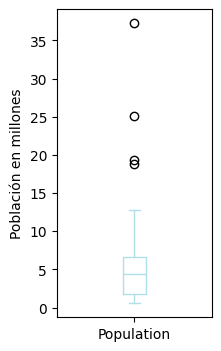

In [17]:
#Dibujando diagrama de caja y bigotes
ax=(data.Population/1_000_000).plot.box(figsize=(2,4),color="powderblue")
ax.set_ylabel("Población en millones")


hay estados con más población q la mediana y por eso los tomó como atípicos

In [18]:
#Calculando la tabla de frecuencias e histogramas
binnedPopulation=pd.cut(data["Population"],10)
binnedPopulation.value_counts()

,count
Population,
"(526935.67, 4232659.0]",24
"(4232659.0, 7901692.0]",14
"(7901692.0, 11570725.0]",6
"(11570725.0, 15239758.0]",2
"(15239758.0, 18908791.0]",1
"(18908791.0, 22577824.0]",1
"(22577824.0, 26246857.0]",1
"(33584923.0, 37253956.0]",1
"(26246857.0, 29915890.0]",0


Text(0, 0.5, 'Población en millones')

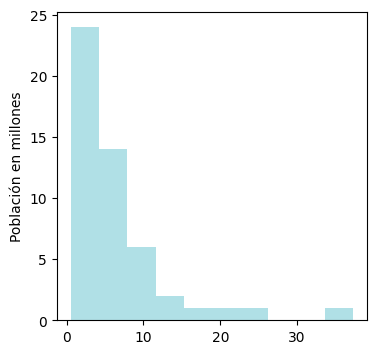

In [19]:
ax=(data.Population/1_000_000).plot.hist(figsize=(4,4),color="powderblue")
ax.set_ylabel("Población en millones")
#

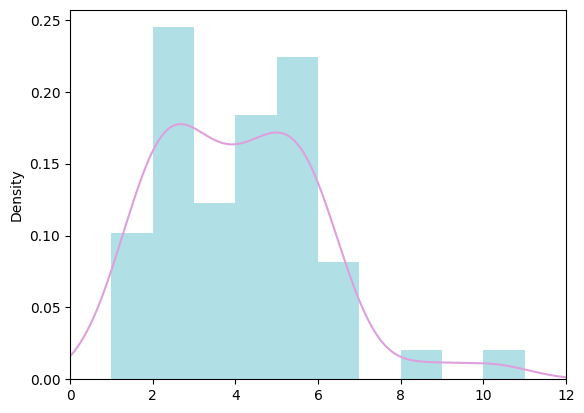

In [20]:
#Diagrama de dispersión y curva de densidad
ax=data["Murder.Rate"].plot.hist(density=True,xlim=[0,12],bins=range(1,12), color="powderblue")
data["Murder.Rate"].plot.density(ax=ax, color="plum")
ax.set_label("Tasa de asesinatos por cada 1000000 habitantes")

Sobre Estimaciones de variabilidad

a). Qué significa que la desviación estándar es casi dos veces mayor que la MAD?

Esto puede indicar que, al el MAD ser menos sensible a los valores atípicos por tomar los promedios de los promedios, los datos son muy influenciados por estos datos atípicos.

b). Cómo puedo mejorar esta situación?

Teniendo en cuenta dicho valor. Además, con un diagrama de caja y bigotes se pueden observar de mejor manera los datos y así sacar mejores conclusiones. Otra manera es quizás, analizando los datos de otra manera, como en este caso, enfocándose mejor en las muertes.

c). Explique el resultado obtenido al calcular IQR

Es el promedio de personas q están en todos los estados. Como este valor es grande, se puede decir que la población varía mucho entre los estados.

In [22]:
#Calcular percentiles de la tasa de homicidios por estado
data["Murder.Rate"].quantile([0.25,0.5,0.75,0.95])

,Murder.Rate
0.25,2.425
0.50,4.000
0.75,5.550
0.95,6.510


Text(0, 0.5, 'Muertes')

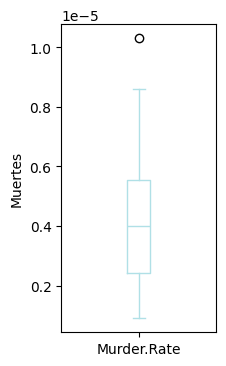

In [21]:
#Dibujando diagrama de caja y bigotes
ax=(data["Murder.Rate"]/1_000_000).plot.box(figsize=(2,4),color="powderblue")
ax.set_ylabel("Muertes")

Sobre exploración en distribución de datos

a) Qué información nos suministra los percentiles de tasa de homicidios por estados?

La mayoría de los estados tienen tasas de homicidios entre 2.4 y 5.5 al formar el 75%. Sin embargo, hay un 5% con tasas por encima de 6.5, lo que indica que algunos estados tienen niveles de homicidios significativamente más altos que el resto, que se entienden como datos atípicos.

b) Explique con sus propias palabras qué información suministra el diagrama de caja con respecto a la tasa de homicidios por estado.

Se observa cómo la mayoría de los datos tienen una tasa de muertes baja, además la medioa de 4 es inferior al centro del rango, por lo que no es del todo simétrica. Además, cabe resaltar el valor atípico, que destaca un estado con un valor muy elevado que puede sesgar los demás datos.

c) Cómo podría agregarse los estados que se encuentran en cada uno de los intervalos? Si no sabe la respuesta, complete la tabla de forma manual y postee su respuesta. Interprete los resultados obtenidos.

In [27]:
# Definir cuartiles
q1 = data["Murder.Rate"].quantile(0.25)
q2 = data["Murder.Rate"].quantile(0.50)
q3 = data["Murder.Rate"].quantile(0.75)
q95 = data["Murder.Rate"].quantile(0.95)

# Crear una columna con la categoría de cuartil
data["Cuartil"] = pd.cut(
    data["Murder.Rate"],
    bins=[-float("inf"), q1, q2, q3, q95, float("inf")],
    labels=["Q1 (Bajo)", "Q2 (Mediano-Bajo)", "Q3 (Mediano-Alto)", "Q4 (Alto)", "datos atípicos"])

from IPython.display import display

for grupo, df_grupo in data.groupby("Cuartil", observed=False):
    print(f"\nEstados en {grupo}:")
    display(df_grupo[["State", "Murder.Rate"]])



Estados en Q1 (Bajo):


,State,Murder.Rate
6,Connecticut,2.4
10,Hawaii,1.8
11,Idaho,2.0
14,Iowa,1.9
18,Maine,1.6
20,Massachusetts,2.0
22,Minnesota,1.6
28,New Hampshire,0.9
36,Oregon,2.0
38,Rhode Island,2.4



Estados en Q2 (Mediano-Bajo):


,State,Murder.Rate
5,Colorado,2.8
15,Kansas,3.1
16,Kentucky,3.6
25,Montana,3.6
26,Nebraska,2.9
29,New Jersey,3.9
31,New York,3.1
33,North Dakota,3.0
34,Ohio,4.0
46,Washington,2.5



Estados en Q3 (Mediano-Alto):


,State,Murder.Rate
2,Arizona,4.7
4,California,4.4
12,Illinois,5.3
13,Indiana,5.0
21,Michigan,5.4
30,New Mexico,4.8
32,North Carolina,5.1
35,Oklahoma,4.5
37,Pennsylvania,4.8
42,Texas,4.4



Estados en Q4 (Alto):


,State,Murder.Rate
0,Alabama,5.7
1,Alaska,5.6
3,Arkansas,5.6
7,Delaware,5.8
8,Florida,5.8
9,Georgia,5.7
19,Maryland,6.1
27,Nevada,6.0
39,South Carolina,6.4
41,Tennessee,5.7



Estados en datos atípicos:


,State,Murder.Rate
17,Louisiana,10.3
23,Mississippi,8.6
24,Missouri,6.6


Se pueden analizar cuales son los estados con menos crímenes o asesinatos. Y de la misma manera, ascendente, por decirlo así, se evidencia los que van teniendo mayores crímenes. Además, quedan claros aquellos estados con un comportamiento atípico, con mayores crímenes.